# Notebook config

In [4]:
import matplotlib.pyplot as plt  
  
# risolvi il sistema di equazioni differenziali come prima  
from scipy.integrate import odeint
import numpy as np  

# Main

## pbtk test

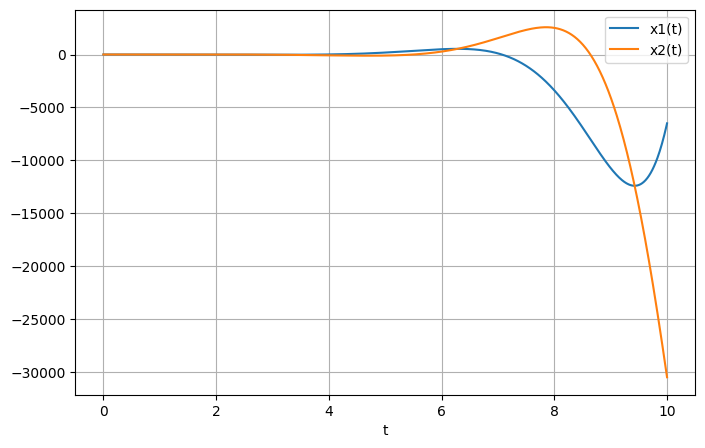

In [6]:

  
def system(y, t):  
    x1, x2 = y  
    dx1dt = x1 - x2  
    dx2dt = x1 + x2  
    return [dx1dt, dx2dt]  
  
y0 = [1, 1]  
t = np.linspace(0, 10, 1000)  
solution = odeint(system, y0, t)  
  
# crea un grafico dei risultati  
plt.figure(figsize=(8,5))  
plt.plot(t, solution[:, 0], label='x1(t)')  
plt.plot(t, solution[:, 1], label='x2(t)')  
plt.legend(loc='best')  
plt.xlabel('t')  
plt.grid()  
plt.show()  


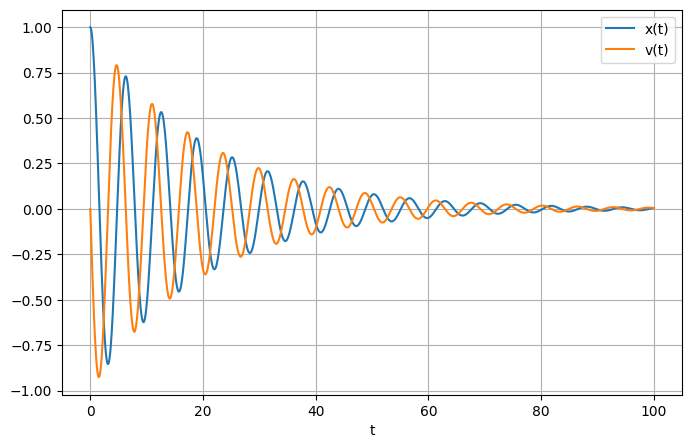

In [9]:
# definisci il sistema di equazioni differenziali  
def system(y, t, m, gamma, k):  
    x, v = y  
    dxdt = v  
    dvdt = -(gamma/m)*v - (k/m)*x  
    return [dxdt, dvdt]  
  
# parametri  
m = 1.0     # massa  
gamma = 0.1 # coefficiente di smorzamento  
k = 1.0     # costante elastica  
  
# condizioni iniziali  
y0 = [1.0, 0.0] # posizione iniziale x=1, velocità iniziale v=0  
  
# intervallo di tempo  
t = np.linspace(0, 100, 1000)  
  
# risolvi il sistema di equazioni differenziali  
solution = odeint(system, y0, t, args=(m, gamma, k))  
  
# crea un grafico dei risultati  
plt.figure(figsize=(8,5))  
plt.plot(t, solution[:, 0], label='x(t)')  
plt.plot(t, solution[:, 1], label='v(t)')  
plt.legend(loc='best')  
plt.xlabel('t')  
plt.grid()  
plt.show()  


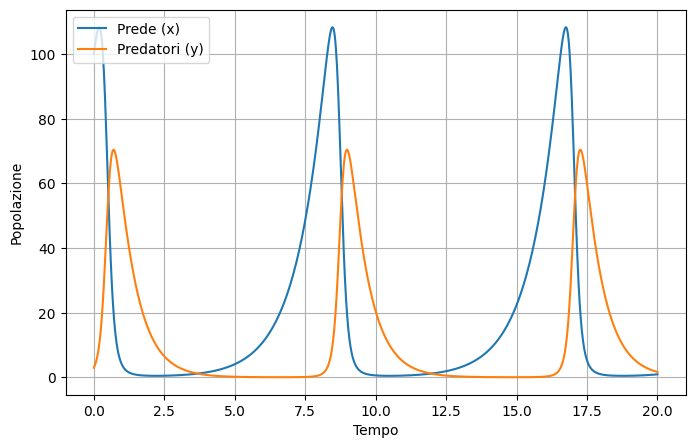

In [20]:
import numpy as np  
from scipy.integrate import odeint  
import matplotlib.pyplot as plt  
  
# definisci il sistema di equazioni differenziali  
def system(y, t, alpha, beta, delta, gamma):  
    x, y = y  
    dxdt = alpha*x - beta*x*y  
    dydt = delta*x*y - gamma*y  
    return [dxdt, dydt]  
  
# parametri  
alpha = 1.0  
beta = 0.1  
delta = 0.075  
gamma = 1.5  
  
# condizioni iniziali  
y0 = [100, 3] # 10 prede e 5 predatori  
  
# intervallo di tempo  
t = np.linspace(0, 20, 1000)  
  
# risolvi il sistema di equazioni differenziali  
solution = odeint(system, y0, t, args=(alpha, beta, delta, gamma))  


# crea un grafico dei risultati  
plt.figure(figsize=(8,5))  
plt.plot(t, solution[:, 0], label='Prede (x)')  
plt.plot(t, solution[:, 1], label='Predatori (y)')  
plt.legend(loc='best')  
plt.xlabel('Tempo')  
plt.ylabel('Popolazione')  
plt.grid()  
plt.show()  


In [7]:
from scipy.integrate import ode  
dC_v_list = []
C_v = 0
# define the system of differential equations  
def system(t, y, C_inh_n, Q_c, Q_p, Q_f, Q_l, Q_s, Q_r, V_f, V_l, V_s, V_r, P_f, P_l, P_s, P_b, P_r, Vmax, Km):    
    C_l, C_f, C_s = y    
    global dC_v_list, C_v
    if t > 4:  
        C_inh_n = 0  
        
    C_a = (Q_c*C_v + Q_p*C_inh_n) / (Q_c + (Q_p/P_b))
    print("C_a_n: ", C_a)
    # Liver
    dc_l_dt = (Q_l/V_l) * (C_a - C_l/P_l) - ((Vmax/V_l * C_l/P_l)/(Km + C_l/P_l))
    print("dc_l_dt: ", dc_l_dt)
    # Fat
    dc_f_dt = round(Q_f/V_f * (C_a - C_f / P_f),2)
    print("dc_f_dt: ", dc_f_dt)
    # Poorly perfused tissue
    dc_s_dt = round(Q_s/V_s * (C_a - C_s / P_s),2)
    print("dc_s_dt: ", dc_s_dt)
    # Richly perfused tissue
    dc_r_dt = round(Q_r/V_r * (C_a - C_r / P_r),2)
    print("dc_r_dt: ", dc_r_dt)
    # Venous blood
    C_v = round((Q_l * C_l/P_l + Q_f*C_f/P_f + Q_s * C_s/P_s + Q_r * C_r/P_r) / (Q_c),2) 
    dC_v_list.append(C_v)

    return [dc_l_dt, dc_f_dt, dc_s_dt, dc_r_dt]  
  
# initial conditions  
y0 = [0, 0, 0, 0]  

# Parametri del modello PBTK a quattro compartimenti per il ratto  
Qc = 5.25  # Cardiac output (L/h)  
Qp = 5.25  # Alveolar ventilation rate (L/h)  
Qf = 0.47  # Fat blood flow (L/h)  
Q1 = 1.31  # Hepatic blood flow (L/h)  
Qs = 0.79  # Poorly perfused tissues (PPT) blood flow (L/h)  
Qr = 2.68  # Richly perfused tissues (RPT) blood flow (L/h)  
  
Vf = 0.022  # Fat volume  
Vl = 0.012  # Liver volume  
Vs = 0.174  # PPT volume  
Vr = 0.012  # RPT volume  
  
Pf = 56.72  # Fat:blood partition coefficient  
Pl = 4.64   # Liver:blood partition coefficient  
Ps = 1.54   # Poorly perfused tissue:blood partition coefficient  
Pr = 4.64   # Richly perfused tissue:blood partition coefficient  
Pb = 18     # Blood:air partition coefficient  
  
Vmax = 1.66  # Maximal velocity of metabolism (mg/h)  
Km = 0.55    # Michaelis–Menten affinity (mg/L)  

C_inh_n = 0.75

t = np.linspace(0, 7, 1400)
  
r = ode(system)\
        .set_f_params(C_inh_n, Qc, Qp, Qf, Q1, Qs, Qr, Vf, Vl, Vs, Vr, Pf, Pl, Ps, Pb, Pr, Vmax, Km)\
        .set_initial_value(y0, t[0])\
        .set_integrator('vode', method='bdf')  
  
dt = 0.005

solution = []
t_values = []
while r.successful() and r.t < 7:  
    next_step = r.integrate(r.t+dt)  
    t_values.append(r.t) 
    solution.append(next_step)  

# Convert the list of arrays to a single 2D numpy array  
solution = np.array(solution)  

Traceback (most recent call last):
capi_return is NULL
Call-back cb_f_in_dvode__user__routines failed.
  File "/var/folders/l8/dhspx46151g9880mlx89gp_c0000gn/T/ipykernel_23209/1317575005.py", line 6, in system
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
ValueError: too many values to unpack (expected 3)


: 

C_a_n:  0.7105263157894737
dc_l_dt:  77.56578947368422
dc_f_dt:  15.18
dc_s_dt:  3.23
dc_r_dt:  158.68
t:  0.0
C_inh_n:  0.75
---------------------------------------------------
C_a_n:  0.7105263157894737
dc_l_dt:  77.56290532193314
dc_f_dt:  15.18
dc_s_dt:  3.23
dc_r_dt:  158.68
t:  4.78350270044673e-07
C_inh_n:  0.75
---------------------------------------------------
C_a_n:  0.7105263157894737
dc_l_dt:  77.56290542917435
dc_f_dt:  15.18
dc_s_dt:  3.23
dc_r_dt:  158.68
t:  4.78350270044673e-07
C_inh_n:  0.75
---------------------------------------------------
C_a_n:  0.7105263157894737
dc_l_dt:  77.56002144313236
dc_f_dt:  15.18
dc_s_dt:  3.23
dc_r_dt:  158.68
t:  9.56700540089346e-07
C_inh_n:  0.75
---------------------------------------------------
C_a_n:  0.7105263157894737
dc_l_dt:  77.5600215503652
dc_f_dt:  15.18
dc_s_dt:  3.23
dc_r_dt:  158.68
t:  9.56700540089346e-07
C_inh_n:  0.75
---------------------------------------------------
C_a_n:  0.7105263157894737
dc_l_dt:  77.290

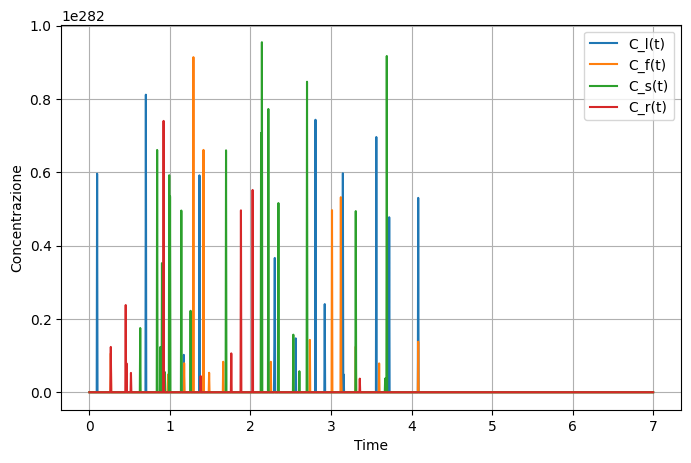

In [711]:
import numpy as np  
from scipy.integrate import odeint ,solve_ivp 
import matplotlib.pyplot as plt  

  
C_v = 0
C_inh_n = 0.75

C_a_list = []
C_v_list = []

# definisci il sistema di equazioni differenziali  
def system(y, t, Q_c, Q_p, Q_f, Q_l, Q_s, Q_r, V_f, V_l, V_s, V_r, P_f, P_l, P_s, P_b, P_r, Vmax, Km):  
    C_l, C_f, C_s, C_r = y  
    global C_v, C_inh_n, C_a_list, C_v_list
    #print("Q_c: ", Q_c, "Q_p: ", Q_p, "Q_f: ", Q_f, "\n",\
    #    "Q_l: ", Q_l, "Q_s: ", Q_s, "Q_r: ", Q_r, "V_f: ", V_f, "\n",\
    #    "V_1: ", V_l, "V_s: ", V_s, "V_r: ", V_r, "P_f: ", "\n",P_f,\
    #    "P_l: ", P_l, "P_s: ", P_s, "P_b: ", P_b, "P_r: ", P_r, "Vmax: ", Vmax, "Km: ", Km)
    #print("---Initial Conditions---")
    #print("C_vn_1: ", C_v, "C_inh_n: ", C_inh_n,"\n", "C_l: ", C_l, "C_f_n_l: ", C_f, "C_s: ", C_s,"\n", "C_r_n_l: ", C_r)
    
    if t > 4:
        C_inh_n = 0
    
    # Arterial blood
    C_a = (Q_c*C_v + Q_p*C_inh_n) / (Q_c + (Q_p/P_b))
    print("C_a_n: ", C_a)
    C_a_list.append(C_a)
    # Liver
    dc_l_dt = (Q_l/V_l) * (C_a - C_l/P_l) - ((Vmax/V_l * C_l/P_l)/(Km + C_l/P_l))
    print("dc_l_dt: ", dc_l_dt)
    # Fat
    dc_f_dt = round(Q_f/V_f * (C_a - C_f / P_f),2)
    print("dc_f_dt: ", dc_f_dt)
    # Poorly perfused tissue
    dc_s_dt = round(Q_s/V_s * (C_a - C_s / P_s),2)
    print("dc_s_dt: ", dc_s_dt)
    # Richly perfused tissue
    dc_r_dt = round(Q_r/V_r * (C_a - C_r / P_r),2)
    print("dc_r_dt: ", dc_r_dt)
    # Venous blood
    C_v = round((Q_l * C_l/P_l + Q_f*C_f/P_f + Q_s * C_s/P_s + Q_r * C_r/P_r) / (Q_c),2)
    C_v_list.append(C_v)
    
    print("t: ", t)
    print("C_inh_n: ", C_inh_n)
    print("---------------------------------------------------")
    return [dc_l_dt, dc_f_dt, dc_s_dt, dc_r_dt]

# Parametri del modello PBTK a quattro compartimenti per il ratto  
Qc = 5.25  # Cardiac output (L/h)  
Qp = 5.25  # Alveolar ventilation rate (L/h)  
Qf = 0.47  # Fat blood flow (L/h)  
Q1 = 1.31  # Hepatic blood flow (L/h)  
Qs = 0.79  # Poorly perfused tissues (PPT) blood flow (L/h)  
Qr = 2.68  # Richly perfused tissues (RPT) blood flow (L/h)  
  
Vf = 0.022  # Fat volume  
Vl = 0.012  # Liver volume  
Vs = 0.174  # PPT volume  
Vr = 0.012  # RPT volume  
  
Pf = 56.72  # Fat:blood partition coefficient  
Pl = 4.64   # Liver:blood partition coefficient  
Ps = 1.54   # Poorly perfused tissue:blood partition coefficient  
Pr = 4.64   # Richly perfused tissue:blood partition coefficient  
Pb = 18     # Blood:air partition coefficient  
  
Vmax = 1.66  # Maximal velocity of metabolism (mg/h)  
Km = 0.55    # Michaelis–Menten affinity (mg/L)  

# condizioni iniziali  
y0 = [0, 0, 0, 0]
  
t = np.linspace(0, 7, 1400)

# risolvi il sistema di equazioni differenziali  
solution = odeint(system, y0, t, args=(Qc, Qp, Qf, Q1, Qs, Qr, Vf, Vl, Vs, Vr, Pf, Pl, Ps, Pb, Pr, Vmax, Km), mxstep=1400)  


# crea un grafico dei risultati
plt.figure(figsize=(8,5))
plt.plot(t, solution[:, 0], label='C_l(t)')
plt.plot(t, solution[:, 1], label='C_f(t)')
plt.plot(t, solution[:, 2], label='C_s(t)')
plt.plot(t, solution[:, 3], label='C_r(t)')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Concentrazione')
plt.grid()
plt.show()


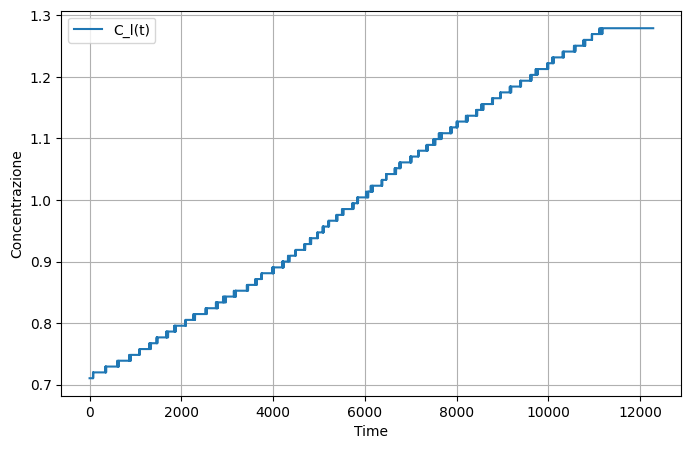

In [712]:
# crea un grafico dei risultati
plt.figure(figsize=(8,5))
plt.plot(range(len(C_a_list)), C_a_list, label='C_l(t)')
#plt.plot(t, solution[:, 1], label='C_f_n_l(t)')
#plt.plot(t, solution[:, 2], label='C_s(t)')
#plt.plot(t, solution[:, 3], label='C_r_n_l(t)')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Concentrazione')
plt.grid()
plt.show()

## rat pbtk

In [643]:
# Parametri del modello PBTK a quattro compartimenti per il ratto  
Q_c = 5.25  # Cardiac output (L/h)  \
Q_p = 5.25  # Alveolar ventilation rate (L/h)  
Q_f = 0.47  # Fat blood flow (L/h)  
Q_l = 1.31  # Hepatic blood flow (L/h)  
Q_s = 0.79  # Poorly perfused tissues (PPT) blood flow (L/h)  
Q_r = 2.68  # Richly perfused tissues (RPT) blood flow (L/h)  
  
V_f = 0.022  # Fat volume  
V_l = 0.012  # Liver volume  
V_s = 0.174  # PPT volume  
V_r = 0.012  # RPT volume  
  
P_f = 56.72  # Fat:blood partition coefficient  
P_l = 4.64   # Liver:blood partition coefficient  
P_s = 1.54   # Poorly perfused tissue:blood partition coefficient  
P_r = 4.64   # Richly perfused tissue:blood partition coefficient  
P_b = 18     # Blood:air partition coefficient  
  
Vmax = 1.66  # Maximal velocity of metabolism (mg/h)  
Km = 0.55    # Michaelis–Menten affinity (mg/L)  

t = []
time = 0.01
while time < 7:
    t.append(time)
    time += 0.005
t[-1]

C_inh_n = 0.75

C_l, C_f, C_s, C_r = 0, 0, 0, 0
C_s, C_r, C_v = 0, 0, 0

C_a_list = []
C_v_list = []
C_l_list = []
C_f_list = []
C_s_list = []
C_r_list = []


for time in t:

    if time > 4:
        C_inh_n = 0


    # Arterial blood
    C_a = round((Q_c*C_v + Q_p*C_inh_n) / (Q_c + (Q_p/P_b)),2)
    print("Arterial blood: ")
    print("C_a: ", C_a)
    print("\n")
    
    # Liver
    dc_l_dt = round( (Q_l/V_l) * (C_a - C_l/P_l) - ((Vmax/V_l * C_l/P_l)/(Km + C_l/P_l)),2)
    C_l = round(dc_l_dt * 0.005 + C_l,2)
    print("Liver: ")
    print("dc_l_dt: ", dc_l_dt)
    print("C_l: ", C_l)
    print("\n")
    
    # Fat
    dc_f_dt = round(Q_f/V_f * (C_a - C_f / P_f),2)
    #C_f = round(dc_f_dt/P_l,2)
    C_f = round(dc_f_dt * 0.005 + C_f,2)
    print("Fat: ")
    print("dc_f_dt: ", dc_f_dt)
    print("C_f: ", C_f)
    print("\n")
    
    # Poorly perfused tissue
    dc_s_dt = round(Q_s/V_s * (C_a - C_s / P_s),2)
    C_s = round(dc_s_dt * 0.005 + C_s,2)
    print("Poorly perfused tissue: ")
    print("dc_s_dt: ", dc_s_dt)
    print("C_s: ", C_s)
    print("\n")    
    
    # Richly perfused tissue
    dc_r_dt = round(Q_r/V_r * (C_a - C_r / P_r),2)
    C_r = round(dc_r_dt * 0.005 + C_r,2)
    print("Richly perfused tissue: ")
    print("dc_r_dt: ", dc_r_dt)
    print("C_r: ", C_r)
    print("\n")
    
    # Venous blood
    C_v = round((Q_l * C_l/P_l + Q_f*C_f/P_f + Q_s * C_s/P_s + Q_r * C_r/P_r) / (Q_c),2)
    print("Venous blood: ")
    print("C_v: ", C_v)
    print("\n")

    C_a_list.append(C_a),C_v_list.append(C_v),C_l_list.append(C_l)
    C_f_list.append(C_f),C_s_list.append(C_s),C_r_list.append(C_r)
    
    print("t: ", time)
    print("-------------------------------------------")
    
    
    

Arterial blood: 
C_a:  0.71


Liver: 
dc_l_dt:  77.51
C_l:  0.39


Fat: 
dc_f_dt:  15.17
C_f:  0.08


Poorly perfused tissue: 
dc_s_dt:  3.22
C_s:  0.02


Richly perfused tissue: 
dc_r_dt:  158.57
C_r:  0.79


Venous blood: 
C_v:  0.11


t:  0.01
-------------------------------------------
Arterial blood: 
C_a:  0.81


Liver: 
dc_l_dt:  60.91
C_l:  0.69


Fat: 
dc_f_dt:  17.27
C_f:  0.17


Poorly perfused tissue: 
dc_s_dt:  3.62
C_s:  0.04


Richly perfused tissue: 
dc_r_dt:  142.88
C_r:  1.5


Venous blood: 
C_v:  0.21


t:  0.015
-------------------------------------------
Arterial blood: 
C_a:  0.91


Liver: 
dc_l_dt:  53.67
C_l:  0.96


Fat: 
dc_f_dt:  19.38
C_f:  0.27


Poorly perfused tissue: 
dc_s_dt:  4.01
C_s:  0.06


Richly perfused tissue: 
dc_r_dt:  131.04
C_r:  2.16


Venous blood: 
C_v:  0.3


t:  0.02
-------------------------------------------
Arterial blood: 
C_a:  0.99


Liver: 
dc_l_dt:  47.68
C_l:  1.2


Fat: 
dc_f_dt:  21.05
C_f:  0.38


Poorly perfused tissue: 
dc

In [3]:
plt.figure(figsize=(8,5))
plt.plot(t, C_v_list, label='Cv')
plt.plot(t, C_a_list, label='Ca')
plt.plot(t, C_l_list, label='Cl')
plt.plot(t, C_s_list, label='Cs')
plt.plot(t, C_r_list, label='Cr')
plt.legend(loc='best')
plt.xlabel('Time (hr)')
plt.ylabel('Concentrazione (mg/L)')
plt.grid()



NameError: name 'plt' is not defined

In [5]:
plt.figure(figsize=(8,5))
plt.plot(t, C_f_list, label='Cv')
plt.legend(loc='best')
plt.xlabel('Time (hr)')
plt.ylabel('Concentrazione (mg/L)')
plt.grid()

NameError: name 't' is not defined

<Figure size 800x500 with 0 Axes>

In [17]:
class PBTKModelRat:  
    def __init__(self, Q_c=5.25, Q_p=5.25, Q_f=0.47, Q_l=1.31, Q_s=0.79, Q_r=2.68,   
                 V_f=0.022, V_l=0.012, V_s=0.174, V_r=0.012,   
                 P_f=56.72, P_l=4.64, P_s=1.54, P_r=4.64, P_b=18,   
                 Vmax=1.66, Km=0.55, C_inh_n=0.75,   
                 C_l=0, C_f=0, C_s=0, C_r=0, C_v=0):    
        # Parameters    
        self.Q_c, self.Q_p, self.Q_f, self.Q_l, self.Q_s, self.Q_r = Q_c, Q_p, Q_f, Q_l, Q_s, Q_r    
        self.V_f, self.V_l, self.V_s, self.V_r = V_f, V_l, V_s, V_r    
        self.P_f, self.P_l, self.P_s, self.P_r, self.P_b = P_f, P_l, P_s, P_r, P_b    
        self.Vmax, self.Km = Vmax, Km    
    
        # Time points    
        self.t = [0.01 + 0.005*i for i in range(int(7/0.005))]    
    
        # Initial conditions    
        self.C_inh_n = C_inh_n    
        self.C_l, self.C_f, self.C_s, self.C_r, self.C_v = C_l, C_f, C_s, C_r, C_v    
    
        # Lists to store results    
        self.C_a_list, self.C_v_list, self.C_l_list, self.C_f_list, self.C_s_list, self.C_r_list = [], [], [], [], [], []    
  
    def calculate_concentrations(self):  
        for time in self.t:  
            if time > 4:  
                self.C_inh_n = 0  
  
            # Arterial blood  
            C_a = round((self.Q_c*self.C_v + self.Q_p*self.C_inh_n) / (self.Q_c + (self.Q_p/self.P_b)),2)  
  
            # Liver  
            dc_l_dt = round( (self.Q_l/self.V_l) * (C_a - self.C_l/self.P_l) - ((self.Vmax/self.V_l * self.C_l/self.P_l)/(self.Km + self.C_l/self.P_l)),2)  
            self.C_l = round(dc_l_dt * 0.005 + self.C_l,2)  
  
            # Fat  
            dc_f_dt = round(self.Q_f/self.V_f * (C_a - self.C_f / self.P_f),2)  
            self.C_f = round(dc_f_dt * 0.005 + self.C_f,2)  
  
            # Poorly perfused tissue  
            dc_s_dt = round(self.Q_s/self.V_s * (C_a - self.C_s / self.P_s),2)  
            self.C_s = round(dc_s_dt * 0.005 + self.C_s,2)  
  
            # Richly perfused tissue  
            dc_r_dt = round(self.Q_r/self.V_r * (C_a - self.C_r / self.P_r),2)  
            self.C_r = round(dc_r_dt * 0.005 + self.C_r,2)  
  
            # Venous blood  
            self.C_v = round((self.Q_l * self.C_l/self.P_l + self.Q_f*self.C_f/self.P_f + self.Q_s * self.C_s/self.P_s + self.Q_r * self.C_r/self.P_r) / (self.Q_c),2)  
  
            # Append results to lists  
            self.C_a_list.append(C_a),self.C_v_list.append(self.C_v),self.C_l_list.append(self.C_l)  
            self.C_f_list.append(self.C_f),self.C_s_list.append(self.C_s),self.C_r_list.append(self.C_r)  
  
        return self.C_a_list, self.C_v_list, self.C_l_list, self.C_f_list, self.C_s_list, self.C_r_list  
    
    def plot_results(self):  
        fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 12))  
        
        ax1.plot(self.t, self.C_v_list, label='Venous')  
        ax1.plot(self.t, self.C_a_list, label='Arterial blood')  
        ax1.plot(self.t, self.C_l_list, label='Liver')  
        ax1.plot(self.t, self.C_s_list, label='Poorly perfused tissue')
        ax1.plot(self.t, self.C_r_list, label='Richly perfused tissue')
        ax1.set_xlabel('Time (h)')  
        ax1.set_ylabel('Concentration (mg/L)')  
        ax1.set_title('Concentration over time in Venous, Arterial blood, Liver, Poorly perfused tissue and Richly perfused tissue')  
        ax1.legend()  
  
        ax2.plot(self.t, self.C_f_list, label='Fat')  
        ax2.set_xlabel('Time (h)')  
        ax2.set_ylabel('Concentration (mg/L)')  
        ax2.set_title('Concentration over time in Fat')  
        ax2.legend()  
  
        plt.tight_layout()  
        plt.show() 


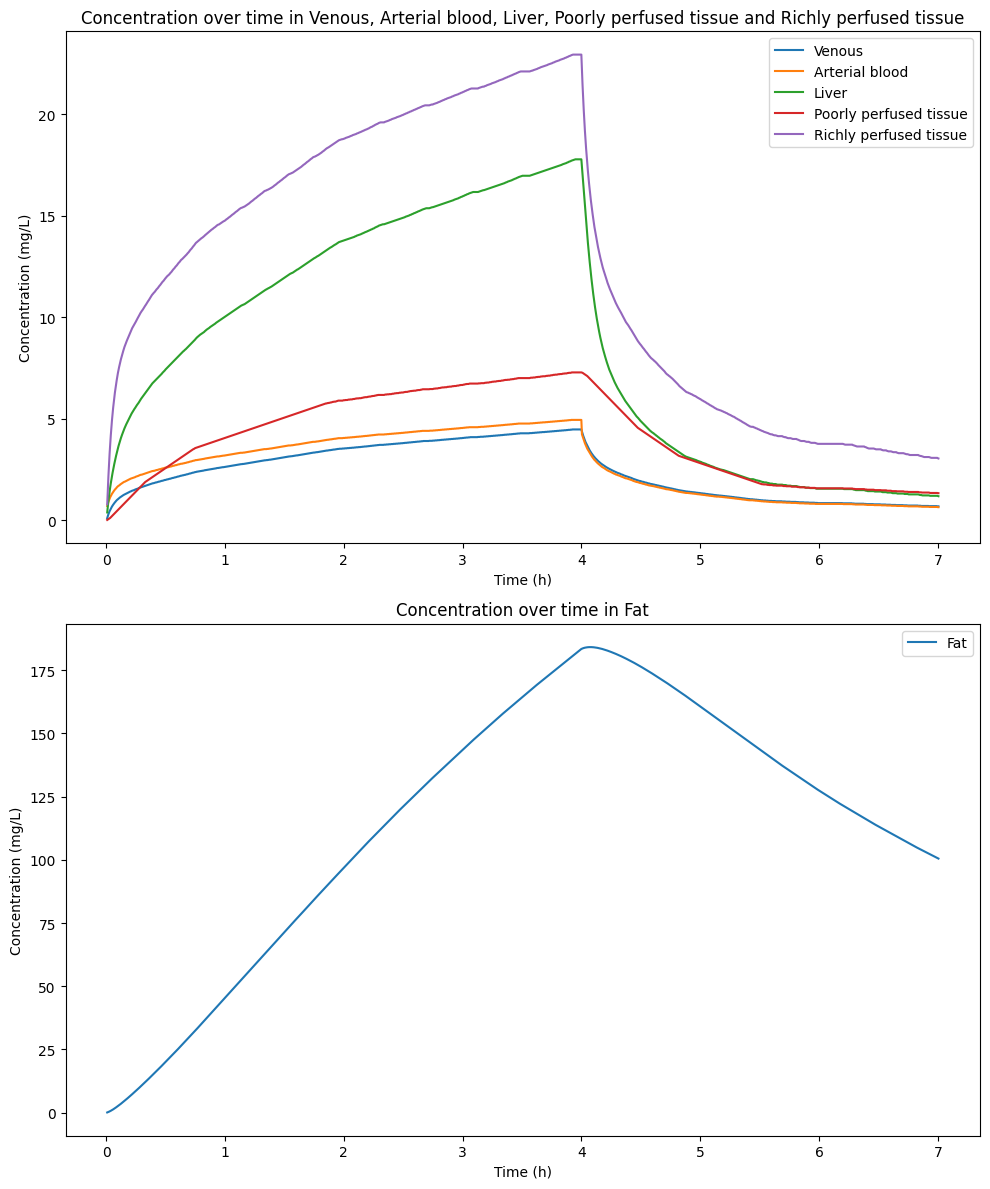

In [18]:
model = PBTKModelRat()  
model.calculate_concentrations()  
model.plot_results()  
